# 07 - Redução de Dimensionalidade e Dados Categóricos

Nessa aula, iremos tratar dos seguintes conteúdos:
- Redução de Dimensionalidade;
- PCA;
- Dados Categóricos;
- Teste Qui-Quadrado;
- Teste ANOVA.

## 

# 1. Redução de Dimensionalidade

## 1.1 Introdução

<br>

Com o avanço tecnológico e com aumento gradativo da geração e armazenamento de dados, os conjuntos de dados a serem trabalhados por modelos de _Machine Learning_ e _Data Science_ estão cada vez maiores e mais complexos, implicando também em um aumento gradativo do poder e tempo de processamento de máquinas sejam elas locais ou em processamento em nuvem.

Mas com o objetivo de minimizar estes impactos, existem algumas técnicas complementares visando auxiliar e diminuir esta carga de processamento, uma dessas técnicas seria a __redução de dimensionalidade__. Redução de dimensionalidade é uma técnica bastante usada em conjunto de dados, normalmente grandes, com o objetivo de aumentar a interpretabilidade dos dados minimizando a quantidade de informação perdida no processo.

uma das principais técnicas de redução de dimensionalidade utilizadas é o __Análise de Componente Principal (PCA)__, técnicas que será detalhada a seguir.

<br><br>

## 1.2 Análise de Componente Principal (PCA)

<br>

A Análise de Componente Principal (_Principal Component Analysis_ em inglês) é a técnica para reduzir a dimensionalidade desses conjuntos de dados, aumentando a interpretabilidade concomitante a minimização da perda de informações. Isso é feito criando novas variáveis não correlacionadas, preservando o máximo de variabilidade possível. O processo matemático por trás disso consiste em uma transformação linear buscando calcular os __autovetores__ e indicando as direções principais deste conjunto de dados.

<br>

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png" width=800>

Fonte: [Analytic Vidhya](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png)

<br>

Este processo basicamente reduz a dimensionalidade do conjunto de dados em um valor $n$, onde $n$ é a quantidade de dimensões a serem utilizadas, retornando pelo PCA uma quantidade $n$ de componentes principais que representam a variabilidade dos dados.

Algumas das vantagens desse processo seria o ganho de uma **interpretação gráfica dos dados** minimizando a perda de informação e também um processo interessante para utilizar em testes de modelo onde seria necessa´rio utilizar um __conjunto de dados muito grande__, pois testa-se o modelo com poucas variáveis mas sem perder o valor e a variabilidade dos dados originais.

A implementação em _Python_ para o PCA é dada pelo bloco de código abaixo:

<br>

```python
# Carregando o PCA do Scikit-Learn
from sklearn.decomposition import PCA

# Istanciando o PCA
pca = PCA(n_components = 2,  # Quantidade de componentes que serão utilizadas
          random_state = 42) # Semente Aleatório

# Transforma os dados e cria o número de componentes necessários
X_pca = pca.fit_transform(X)

```

<br><br>

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carrega os dados
covid = pd.read_csv('./datasets/covid.csv', index_col = 0)

# Mostra as primeiras linhas
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [8]:
# Dados Faltantes
covid.isna().sum()

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [9]:
# Preenche com zeros os dados faltantes
covid.fillna(0, inplace = True)

In [10]:
# Verificação os preenchimentos
covid.isna().sum()

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [11]:
# Separa os dados em X e y
X = covid.drop(['covid_res'], axis = 1)
y = covid['covid_res']

In [12]:
# Carrega o train_test_split
from sklearn.model_selection import train_test_split

In [13]:
# Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [14]:
# normalização dos dados
from sklearn.preprocessing import StandardScaler

In [15]:
# Instancia a normalização
scaler = StandardScaler()

In [16]:
# Transformando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [17]:
# Carrega o modelo
from sklearn.linear_model import LogisticRegression

In [18]:
# Instancia o modelo
model = LogisticRegression()

In [19]:
# Fit do modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [20]:
# Gera as predições
y_pred = model.predict(X_test_std)

In [21]:
# Classification report
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72     83533
           1       0.65      0.37      0.47     66375

    accuracy                           0.63    149908
   macro avg       0.64      0.60      0.59    149908
weighted avg       0.64      0.63      0.61    149908



In [23]:
# Aplicando o PCA

In [24]:
# Carregar o PCA
from sklearn.decomposition import PCA

In [25]:
# Instancia o PCA p/ 2 componentes
pca = PCA(n_components = 2,
          random_state = 42)

In [26]:
# X_test_Std
X_test_std

array([[ 1.01307057,  0.52522142, -0.13602054, ..., -0.30743287,
         1.23832751, -0.13591148],
       [-0.98709807,  0.52522142, -0.13602054, ..., -0.30743287,
        -0.80754081, -0.13591148],
       [-0.98709807,  0.52522142, -0.13602054, ..., -0.30743287,
        -0.80754081, -0.13591148],
       ...,
       [-0.98709807,  0.52522142, -0.13602054, ..., -0.30743287,
         1.23832751, -0.13591148],
       [ 1.01307057,  0.52522142, -0.13602054, ..., -0.30743287,
        -0.80754081, -0.13591148],
       [ 1.01307057,  0.52522142, -0.13602054, ..., -0.30743287,
         1.23832751, -0.13591148]])

In [27]:
# Aplicando o PCA
X_pca = pca.fit_transform(X_test_std)

In [28]:
# Olhando para o PCA
X_pca

array([[-1.05603125, -0.32248315],
       [-1.00881803,  0.50198737],
       [-0.35467627,  0.0347388 ],
       ...,
       [-0.92791497, -0.15217966],
       [ 0.14269297, -0.82086417],
       [-1.91363159,  0.5286142 ]])

In [29]:
# transforma em um dataframe
df_pca = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])

In [30]:
# Mostra a tabela
df_pca

,x_PCA,y_PCA
0,-1.056031,-0.322483
1,-1.008818,0.501987
2,-0.354676,0.034739
3,-0.862617,0.135741
4,0.692303,0.460139
...,...,...
149903,2.551203,-2.134599
149904,2.626396,0.189926
149905,-0.927915,-0.152180
149906,0.142693,-0.820864


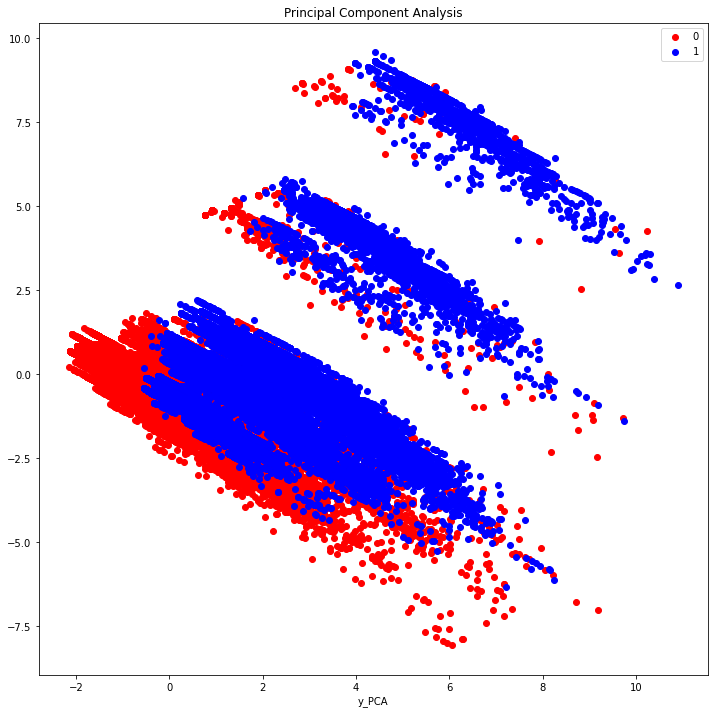

In [31]:
# construindo um gráfico
class_labels = np.unique(y_test)

# Definir as cores
colors = ['red', 'blue']

# Variável auxiliar
aux = 0

# Ajustando a figura nates do plot
plt.figure(figsize = (12, 12))

# Criar o loop varrendo as classes
for c in class_labels:
    ind = np.where(y_pred == c)
    plt.scatter(df_pca['x_PCA'].iloc[ind], 
                df_pca['y_PCA'].iloc[ind],
                color = colors[aux],
                label = c)
    aux += 1
    
plt.xlabel('x_PCA')
plt.xlabel('y_PCA')
plt.title('Principal Component Analysis')
plt.legend()
plt.show()

In [32]:
# Roda denovo o PCA
pca = PCA(random_state = 42).fit(X_test_std)

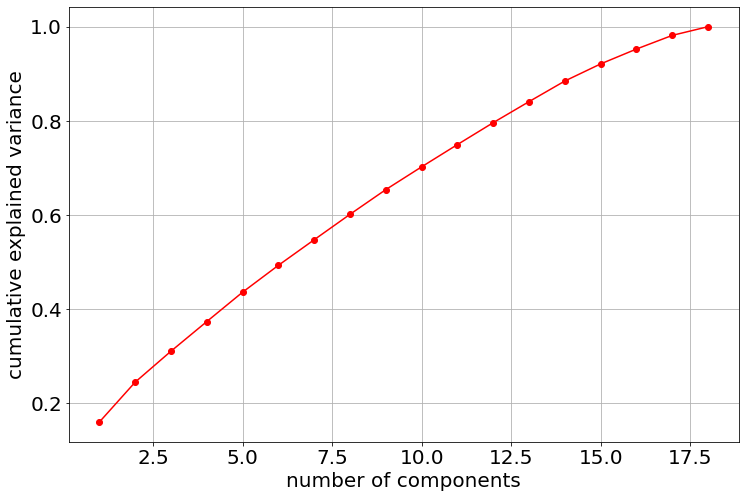

In [33]:
# Configurar o plot
plt.figure(figsize=(12, 8))

# Numero de componentes
ncomp = np.arange(1, np.shape(X_test_std)[1]+1)

# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')

# Customização de Gráfico
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

## 

# 2. Dados Categóricos

## 2.1 Introdução

<br>

Os dados categóricos são os tipos de variáveis definidos anteriormente como variáveis __qaulitativas__ e que poderiam ser separados em dois principais tipos, __nominais__ ou __ordinais__ como definidos abaixo:

<br> 

- __qualitativa nominal__: as variáveis do tipo qualitativas não apresentam valores mensuráveis. No caso das variáveis __qualitativas__ e __nominais__, as variáveis __não apresentam uma ordenação ou hierárquia__ entre as categorias. __Exemplo:__ Sexo, País, estado civil e etc;

- __qualitativa ordinal__: Já para as variáveis __qualitativas__ e __ordinais__, as variáveis __apresentam uma ordenação ou hierárquia__ entre as categorias. __Exemplo:__ escolaridade, faixa salarial, período do dia e etc.

<br>

De forma análoga ao processo feito com as variáveis __quantitativas__ (no caso númericas), existem testes de hipóteses que são capazes de dizer a qualidade de uma determinada variável categórica em relação ao poder de separação em um modelo. Os testes que são aplicados em variáveis categóricas são os chamados de __testes não-paramétricos__.

Nos tópicos a seguir, será discutido a respeito de dois testes muito utilizados no processo de __seleção de atributos__, estes testes são o __Qui-Quadrado__ e __ANOVA__

<br><br>

## 2.2 Teste Qui-Quadrado

<br>

O Teste __Qui-Quadrado__ (_Chi-Squared_ em inglês) é um teste não-paramétrico que mede a relação de dependência entre duas variáveis categóricas, verificando se os valores esperados estão muito distantes dos valores observados para estas métricas. Ou seja, dados o vetor de contagens observadas $Oij=(O_{11},O_{12}, .…, O_{rc})$, r $E_{ij}$ representa os valores esperadas e admintindo válida a hipótese de independência dos critérios de classificação, a estatística para oteste de Qui-Quadrado pode ser definida a seguir:

<br>

$$ X^2 = \sum_{i=1}^r \sum_{j=1}^c \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

<br>

Para valores altos da estatística do QUi_quadrado (respectivamente um valor baixo para o _p-value_), significa uma evidência forte que os valores observados e esperados são diferentes, portanto possuem dependência entre si. Esse grau de dependência entre as variáveis está relacionado diretamente com o valor do Qui_quadrado, quanto maior o valor da estatística, maior a dependência.

A implementação em _Python_ para o teste Quidrado pode ser feito conforme o código a seguir:

<br>

```python
# Carrega a função do Qui Quadrado
from sklearn.feature_selection import chi2

# Aplicando o teste Qui quadrado
chi_scores = chi2(X, # Todas as variáveis categóricas
                  y) # Variável resposta 
```

<br>

Dessa forma, é possível determinar dentre todas as variáveis categóricas em um conjunto de dados, quais que têm forte dependência com a variável resposta, em modelos de classificação no caso. Vale ressaltar que as variáveis categóricas devem ser convertidas para uma identificação númerica antes de aplicar o teste.

<br><br>

## 2.3 ANOVA

<br>

O teste __ANOVA__ (_Analysis of Variance_ em inglês) é um teste não-paramétrico para verificar se existe diferenças significativas entre as médias de grupos de dados, sendo possível inferir se as variáveis são dependentes uma sobre a outra. Para isso, calcula-se a relação entre a variância entre grupos $S_B^2$ com a variância dentro dos grupos $S_W^2$, conforme a fórmula a seguir:

<br>

$$ F = \frac{S_B^2}{S_W^2}$$

<br>

A partir da estatística do valor $F$, quanto maior for a variância entre os grupos, mais diferentes as duas variáveis serão entre si. Dessa forma de acordo com o valor $F$ pode se inferir a respeito das variáveis serem diferentes e exercerem influência entre si.

A implementação em _Python_ para o teste ANOVA pode ser feito conforme o código a seguir:

<br>

```python
# Carrega a função ANOVA
from sklearn.feature_selection import f_classif

# Aplicando o teste Qui quadrado
F_scores = f_classif(X, # Todas as variáveis categóricas
                     y) # Variável resposta 
```

<br>

De forma análoga ao Qui-Quadrado, com este teste é possível determinar dentre todas as variáveis categóricas em um conjunto de dados, quais que têm forte dependência com a variável resposta, em modelos de classificação no caso. Vale ressaltar novamente que as variáveis categóricas devem ser convertidas para uma identificação númerica antes de aplicar o teste.

<br><br>

### Usando o Qui-Quadrado

In [34]:
# Vamos olhar os dados
X.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,0,0


In [35]:
# Removendo a variavel age
X.drop(['age'], axis = 1, inplace = True)

In [36]:
# carrega o chi2
from sklearn.feature_selection import chi2

In [37]:
# Calculando os scores
chi_scores = chi2(X, y)

In [38]:
chi_scores

(array([1.34230286e+03, 4.47634957e+03, 2.84986834e+03, 1.71986949e+04,
        3.27704975e+01, 4.87178638e+03, 2.42443612e+01, 3.00921382e+02,
        1.50913033e+02, 3.49982016e+03, 6.95788132e+01, 5.07398149e+00,
        2.46878333e+03, 5.38510161e+01, 3.26382150e+02, 3.31947108e+03,
        1.53022969e+03]),
 array([7.24986724e-294, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.03706937e-008, 0.00000000e+000, 8.48551433e-007, 2.07507699e-067,
        1.09495507e-034, 0.00000000e+000, 7.34213380e-017, 2.42875369e-002,
        0.00000000e+000, 2.16283207e-013, 5.89892555e-073, 0.00000000e+000,
        0.00000000e+000]))

In [39]:
# Avaliando as Features
list_columns = list(X.columns)

chi_score = list(chi_scores[0])

p_value = list(chi_scores[1])


dict_output = {
    "Feature": list_columns,
    "Chi Score": chi_score,
    "P-Value": np.round(p_value, 3)
}

df_chi = pd.DataFrame(dict_output)

df_chi

,Feature,Chi Score,P-Value
0,sex,1342.302856,0.000
1,patient_type,4476.349572,0.000
2,intubed,2849.868343,0.000
3,pneumonia,17198.694878,0.000
4,pregnancy,32.770498,0.000
5,diabetes,4871.786377,0.000
6,copd,24.244361,0.000
7,asthma,300.921382,0.000
8,inmsupr,150.913033,0.000
9,hypertension,3499.820164,0.000


### Utilizando o ANOVA

In [40]:
# carrega o Anova
from sklearn.feature_selection import f_classif

In [41]:
# Aplicar o ANOVA
F_scores = f_classif(X, y)

In [42]:
F_scores

(array([2.66423093e+03, 2.17017047e+04, 2.91969748e+03, 2.12840487e+04,
        3.30112839e+01, 5.62900572e+03, 2.46537813e+01, 3.11205585e+02,
        1.53437077e+02, 4.21553802e+03, 7.18001919e+01, 5.19267737e+00,
        2.97048765e+03, 5.49586639e+01, 3.57331513e+02, 5.53998107e+03,
        1.56319358e+03]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.16785040e-09, 0.00000000e+00, 6.86325364e-07, 1.25247037e-69,
        3.11122989e-35, 0.00000000e+00, 2.38761060e-17, 2.26826663e-02,
        0.00000000e+00, 1.23284444e-13, 1.14427637e-79, 0.00000000e+00,
        0.00000000e+00]))

In [43]:
# Avaliando as Features
list_columns = list(X.columns)

F_score = list(F_scores[0])

p_value = list(F_scores[1])


dict_output = {
    "Feature": list_columns,
    "F Score": F_score,
    "P-Value": np.round(p_value, 3)
}

df_F = pd.DataFrame(dict_output)

df_F

,Feature,F Score,P-Value
0,sex,2664.230927,0.000
1,patient_type,21701.704706,0.000
2,intubed,2919.697477,0.000
3,pneumonia,21284.048743,0.000
4,pregnancy,33.011284,0.000
5,diabetes,5629.005719,0.000
6,copd,24.653781,0.000
7,asthma,311.205585,0.000
8,inmsupr,153.437077,0.000
9,hypertension,4215.538022,0.000


## Escolha do Threshold

In [44]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# desab0ilita os warnings
import warnings
warnings.filterwarnings('ignore')

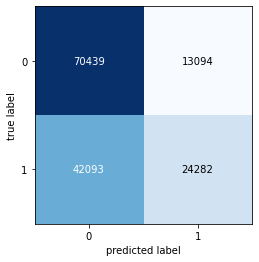

In [45]:
# gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [46]:
# Print do Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72     83533
           1       0.65      0.37      0.47     66375

    accuracy                           0.63    149908
   macro avg       0.64      0.60      0.59    149908
weighted avg       0.64      0.63      0.61    149908



In [47]:
# Calcular o predict proba
y_proba = model.predict_proba(X_test_std)
y_proba

array([[0.60919995, 0.39080005],
       [0.61172234, 0.38827766],
       [0.51335897, 0.48664103],
       ...,
       [0.55706722, 0.44293278],
       [0.43725837, 0.56274163],
       [0.7515147 , 0.2484853 ]])

In [48]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba[:, 1], 3)

In [50]:
results_test.head()

,covid_res,proba
373402,0,0.391
181022,1,0.388
317841,0,0.487
272745,0,0.377
153280,1,0.592


In [51]:
# Parametros do Loop
threshold_increment = 0.02
threshold_begin = threshold_increment
threshold_end = 1.0

In [52]:
list_threshold = []
list_TN = []
list_FN = []
list_TP = []
list_FP = []
list_precision = []
list_recall = []
list_accuracy = []
list_f1_score = []

for i in np.arange(threshold_begin,
                   threshold_end + threshold_increment,
                   threshold_increment):
    # reduz as casas decimais do i
    i_threshold = np.round(i, 2)
    # PRint do i
    print(str(i_threshold) + ' ', end = '')
    
    # construindo a y_pred
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x>= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 0), 1, 0)
    
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((FP + TP) > 0, TP / (FP + TP), 0)
    recall = np.where((FN + TP) > 0, TP / (FN + TP), 0)
    accuracy = np.where((TP + TN + FN + FP) > 0, (TP + TN)/(TP + TN + FN + FP), 0)
    f1_score = np.where((precision + recall) > 0 , 2*(precision*recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_TP.append(TP)
    list_FP.append(FP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))
    
############################################################

dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [53]:
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,83533,66375,0.4428,1.0000,0.4428,0.6138
1,0.04,0,0,83533,66375,0.4428,1.0000,0.4428,0.6138
2,0.06,4,2,83529,66373,0.4428,1.0000,0.4428,0.6138
3,0.08,9,5,83524,66370,0.4428,0.9999,0.4428,0.6138
4,0.10,15,8,83518,66367,0.4428,0.9999,0.4428,0.6138
5,0.12,21,9,83512,66366,0.4428,0.9999,0.4429,0.6138
6,0.14,38,17,83495,66358,0.4428,0.9997,0.4429,0.6138
7,0.16,67,33,83466,66342,0.4428,0.9995,0.4430,0.6138
8,0.18,122,44,83411,66331,0.4430,0.9993,0.4433,0.6138
9,0.20,224,94,83309,66281,0.4431,0.9986,0.4436,0.6138


Text(0.5, 1.0, 'Precision and Recall')

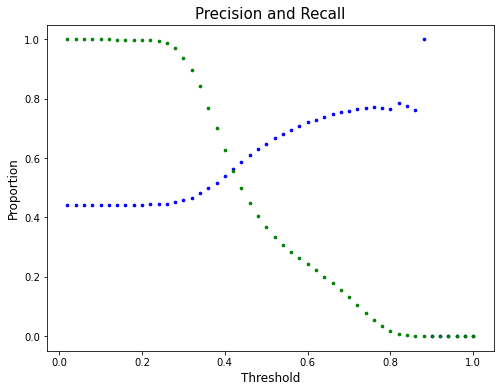

In [54]:
# Precison-Recall-Threshold Curve

k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)
plt.title("Precision and Recall", fontsize = 15)

[Text(0.5, 0, 'Threshold'), Text(0, 0.5, 'F1 Score'), (0.0, 1.02), (0.0, 1.0)]

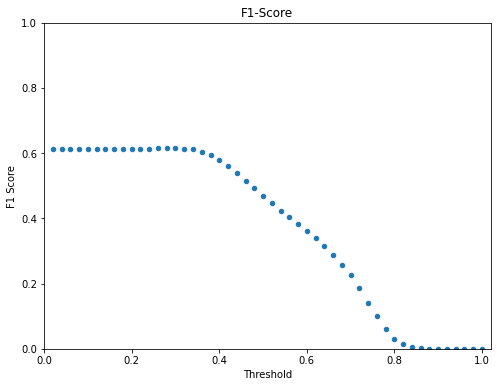

In [55]:
# F1-Score Curve

grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=False, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))


In [56]:
# Construir a nova predição
y_pred2 = np.where(y_proba[:, 1] >= 0.28, 1, 0)

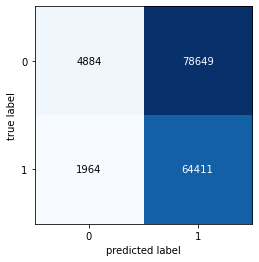

In [57]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [58]:
# Print do classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.06      0.11     83533
           1       0.45      0.97      0.62     66375

    accuracy                           0.46    149908
   macro avg       0.58      0.51      0.36    149908
weighted avg       0.60      0.46      0.33    149908



## 

## Exercícios

__1)__ Realize uma classificação com da coluna y dos dados de marketing bancário (contido no arquivo `bank-full.csv`) utilizando uma Regressão Logística. Após isso faça o processo de seleção de atributos utilizados o Lasso e Os testes Qui-Quadrado e ANOVA. Qual resultado do modelo ficou melhor antes ou depois da seleção de atributos? Plote os dados de teste utilizando o PCA e compare as separações.

In [104]:
df = pd.read_csv('./datasets/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [105]:
# aplicando o get_dummies
df = pd.get_dummies(df, prefix_sep = "_",
                             columns = ['job', 
                                        'marital', 
                                        'education',
                                        'contact',
                                        'poutcome'],
                             drop_first = True)

In [106]:
df['default'] = df['default'].replace({'no':0,'yes':1})
df['housing'] = df['housing'].replace({'no':0,'yes':1})
df['loan']    = df['loan'].replace({'no':0,'yes':1})
df['Target']  = df['Target'].replace({'no':0,'yes':1})
df.month = pd.to_datetime(df.month, format='%b').dt.month

In [107]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [109]:
X = df.select_dtypes(include = [np.number]).drop(columns = 'Target')
y = df['Target']

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Shape das bases de treino e teste
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31647, 32) (13564, 32) (31647,) (13564,)


In [110]:
# Instanciando a normalização
scaler = StandardScaler()

# Transformando os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instanciando o classificador
model = LogisticRegression()

# Fit do Modelo
model.fit(X_train_std, y_train)

# Gerando as predições
y_pred = model.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
# Cálculo das probabilidades de cada uma das classes
y_proba = model.predict_proba(X_test_std)

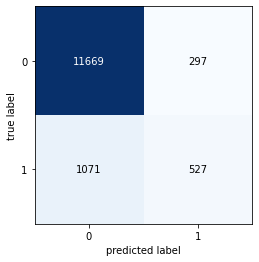

In [112]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [113]:
# Print do classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     11966
           1       0.64      0.33      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



### Lasso

In [115]:
from sklearn.linear_model import Lasso
# Instancia o modelo
lasso = Lasso(alpha = 5)

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [116]:
# Feature Importance - Lasso
coefs3 = lasso.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs3):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary3 = {'Features': list_feature,
              'Scores': list_score}

df_features3 = pd.DataFrame(dictionary3)
df_features3 = df_features3.sort_values(by=['Scores'], ascending=False)
df_features3.reset_index(inplace=True, drop=True)
df_features3

,Features,Scores
0,age,0.0
1,default,-0.0
2,poutcome_success,0.0
3,poutcome_other,0.0
4,contact_unknown,-0.0
5,contact_telephone,0.0
6,education_unknown,0.0
7,education_tertiary,0.0
8,education_secondary,-0.0
9,marital_single,0.0


---
__2)__ Vamos trabalhar com o dataset `sports.csv`, para predizer se um determinado atleta têm mais que 5 anos de carreira ou não (esta é justamente a marcação de _target_ na base). Para o desenvolvimento do exercício aplique uma seleção de atributos, depois modele utilizando uma Regressão Logística e por fiz avalie a separação dos dados com o PCA.

In [71]:
sports = pd.read_csv('./datasets/sports.csv')
sports

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [80]:
sports = sports.drop_duplicates(keep='first')
sports['3PointPercent'] = sports['3PointPercent'].replace({np.nan:0})

In [81]:
X = sports.select_dtypes(include = [np.number]).drop(columns = ['Target','MinutesPlayed','PointsPerGame',
                                                                      'FieldGoalsMade','FieldGoalsAttempt','3PointMade',
                                                                      'FreeThrowMade','FreeThrowAttempt','OffensiveRebounds', 
                                                                      'DefensiveRebounds','Rebounds', 'Assists', 'Steals'])
y = sports['Target']

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Shape das bases de treino e teste
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(929, 7) (399, 7) (929,) (399,)


In [83]:
# Instanciando a normalização
scaler = StandardScaler()

# Transformando os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instanciando o classificador
model = LogisticRegression()

# Fit do Modelo
model.fit(X_train_std, y_train)

# Gerando as predições
y_pred = model.predict(X_test_std)

In [84]:
# Cálculo das probabilidades de cada uma das classes
y_proba = model.predict_proba(X_test_std)

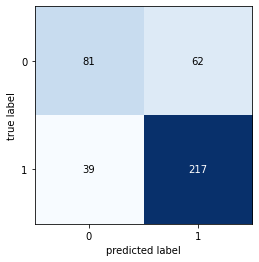

In [85]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [86]:
# Print do classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       143
           1       0.78      0.85      0.81       256

    accuracy                           0.75       399
   macro avg       0.73      0.71      0.71       399
weighted avg       0.74      0.75      0.74       399



In [87]:
# Carregar o PCA
from sklearn.decomposition import PCA

# Instancia o PCA p/ 2 componentes
pca = PCA(n_components = 2, random_state = 42)

# Aplicando o PCA
X_pca = pca.fit_transform(X_test_std)

# transforma em um dataframe
df_pca = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])

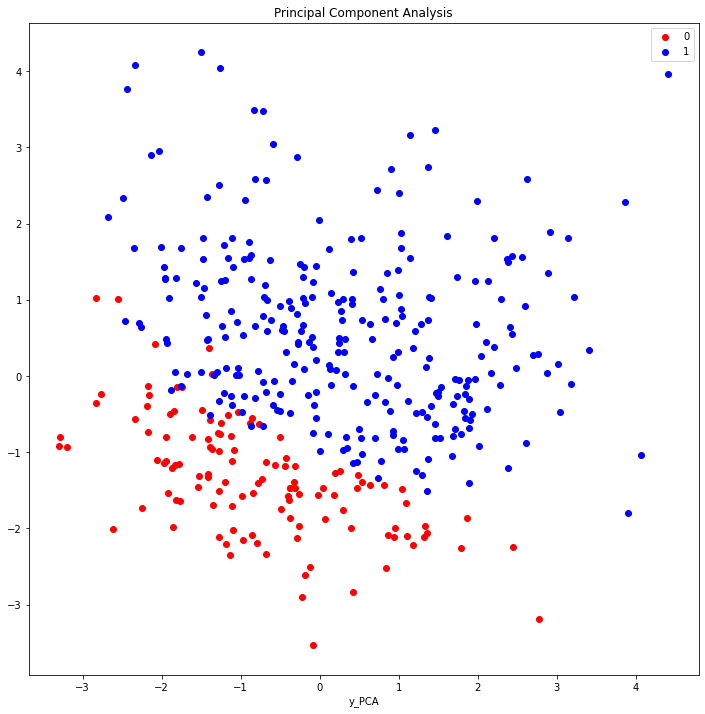

In [88]:
# construindo um gráfico
class_labels = np.unique(y_test)

# Definir as cores
colors = ['red', 'blue']

# Variável auxiliar
aux = 0

# Ajustando a figura nates do plot
plt.figure(figsize = (12, 12))

# Criar o loop varrendo as classes
for c in class_labels:
    ind = np.where(y_pred == c)
    plt.scatter(df_pca['x_PCA'].iloc[ind], 
                df_pca['y_PCA'].iloc[ind],
                color = colors[aux],
                label = c)
    aux += 1
    
plt.xlabel('x_PCA')
plt.xlabel('y_PCA')
plt.title('Principal Component Analysis')
plt.legend()
plt.show()

In [89]:
# Roda de novo o PCA
pca = PCA(random_state = 42).fit(X_test_std)

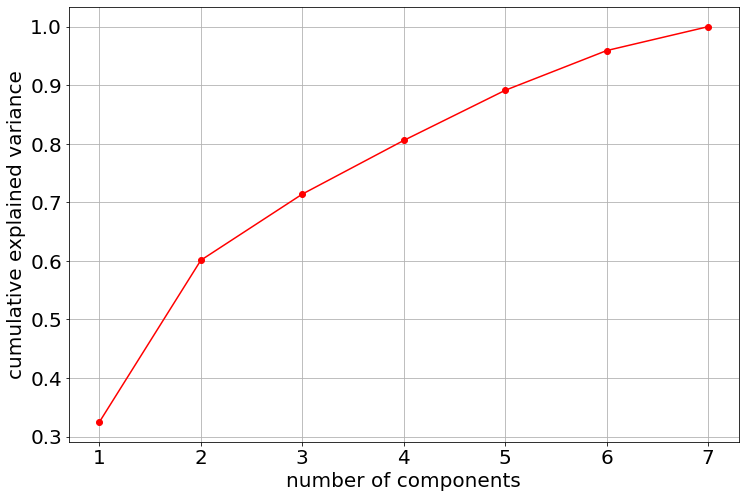

In [90]:
# Configurar o plot
plt.figure(figsize=(12, 8))

# Numero de componentes
ncomp = np.arange(1, np.shape(X_test_std)[1]+1)

# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')

# Customização de Gráfico
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

## 